# Credit Card Fraud Detection

The Credit Card Fraud Detection project aims to build a machine learning model that identifies fraudulent credit card transactions. By analyzing historical transaction data, the goal is to develop a model that accurately distinguishes between legitimate and fraudulent transactions, thereby helping financial institutions and customers prevent financial losses.

**Objectives**

**Data Collection and Understanding:** Obtain and comprehend the dataset, including the features that characterize each transaction.

**Data Preprocessing:** Clean and preprocess the data to prepare it for modeling. This includes handling missing values, scaling features, and balancing the dataset.

**Feature Engineering:** Create and select features that enhance the model's predictive power.

**Model Building:** Develop classification models to detect fraudulent transactions, including logistic regression, decision trees, random forests, and advanced techniques like gradient boosting and neural networks.

**Model Evaluation:** Assess the performance of the models using appropriate evaluation metrics and select the best one.

**Insights:** Derive insights into the factors that contribute to fraudulent transactions and the model's decision-making process.

**Deployment:** Deploy the final model to a production environment for real-time fraud detection (optional).

In [26]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


In [27]:
Dataset = pd.read_excel("creditcard.xlsx")
Dataset

Time         V1         V2        V3        V4        V5        V6  \
0            0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0   1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1  -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2  -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...        ...        ...       ...       ...       ...       ...   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1      -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2       0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3       0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4       0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941 -0.689256   
284803  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802  1.214756   
284804 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119 -0.183699   
284805 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886 -1.042082   
284806  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513 -0.188093   

             V14       V15       V16       V17       V18       V19       V20  \
0      -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1      -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2      -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3      -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4      -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   
...          ...       ...       ...       ...       ...       ...       ...   
284802  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920  1.475829   
284803 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556  0.059616   
284804 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252  0.001396   
284805  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849  0.127434   
284806 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117  0.382948   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1      -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2       0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3      -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4      -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651   
284803  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472   
284804  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455   
284805  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821   
284806  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415   

             V28  Amount  Class  
0      -0.021053  149.62      0  
1       0.014724    2.69      0  
2      -0.059752  378.66      0  
3       0.061458  123.50      

In [28]:
Dataset.shape

(284807, 31)

In [29]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
Dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [31]:
print("Credit Card Fraud Detection data -  rows:",Dataset.shape[0]," columns:", Dataset.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [32]:
Dataset.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   
6  0.081213  0.464960 -0.099254 -1.416907 -0.153826 -0.751063  0.167372   
7 -3.807864  0.615375  1.249376 -0.619468  0.291474  1.757964 -1.323865   
8  0.851084 -0.392048 -0.410430 -0.705117 -0.110452 -0.286254  0.074355   
9  0.069539 -0.736727 -0.366846  1.017614  0.836390  1.006844 -0.443523   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   
6  0.050144 -0.443587  0.002821 -0.611987 -0.045575 -0.219633 -0.167716   
7  0.686133 -0.076127 -1.222127 -0.358222  0.324505 -0.156742  1.943465   
8 -0.328783 -0.210077 -0.499768  0.118765  0.570328  0.052736 -0.073425   
9  0.150219  0.739453 -0.540980  0.476677  0.451773  0.203711 -0.246914   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   
6 -0.270710 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168   
7 -1.015455  0.057504 -0.649709 -0.415267 -0.051634 -1.206921 -1.085339   
8 -0.268092 -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404   
9 -0.633753 -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0  
5    3.67      0  
6    4.99      0  
7   40.80      0  
8   93.20      0  
9    3.68      0

In [33]:
Dataset.tail(10)

Time         V1         V2        V3        V4        V5        V6  \
284797  172782  -0.241923   0.712247  0.399806 -0.463406  0.244531 -1.343668   
284798  172782   0.219529   0.881246 -0.635891  0.960928 -0.152971 -1.014307   
284799  172783  -1.775135  -0.004235  1.189786  0.331096  1.196063  5.519980   
284800  172784   2.039560  -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
284801  172785   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
284797  0.929369 -0.206210  0.106234 -0.284708 -0.612982 -0.066655 -0.732987   
284798  0.427126  0.121340 -0.285670 -0.111640 -1.109232 -0.453235 -1.046946   
284799 -1.518185  2.080825  1.159498 -0.594242 -1.264072  0.453596 -0.243142   
284800  0.017050 -0.118228  0.435402  0.267772  0.523316  0.559047 -0.834660   
284801  0.812722  0.115093 -0.204064 -0.657422  0.644837  0.190916 -0.546329   
284802 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941 -0.689256   
284803  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802  1.214756   
284804 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119 -0.183699   
284805 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886 -1.042082   
284806  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513 -0.188093   

             V14       V15       V16       V17       V18       V19       V20  \
284797  0.237948 -0.293959 -0.245496 -0.174846 -0.891169 -0.290491 -0.139512   
284798  1.122674  1.243518 -1.431897  0.939328 -0.002373  2.894952  0.006666   
284799 -0.858719 -0.766554 -0.644646  0.447184  0.388721  0.792135  0.348176   
284800  0.626211 -0.541494  0.225361 -0.605252 -0.163049  0.561695 -0.256922   
284801 -0.731707 -0.808036  0.599628  0.070441  0.373110  0.128904  0.000676   
284802  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920  1.475829   
284803 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556  0.059616   
284804 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252  0.001396   
284805  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849  0.127434   
284806 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117  0.382948   

             V21       V22       V23       V24       V25       V26       V27  \
284797 -0.228876 -0.514376  0.279598  0.371441 -0.559238  0.113144  0.131507   
284798  0.099936  0.337120  0.251791  0.057688 -1.508368  0.144023  0.181205   
284799  0.103302  0.654850 -0.348929  0.745323  0.704545 -0.127579  0.454379   
284800 -0.268048 -0.717211  0.297930 -0.359769 -0.315610  0.201114 -0.080826   
284801 -0.314205 -0.808520  0.050343  0.102800 -0.435870  0.124079  0.217940   
284802  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651   
284803  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472   
284804  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455   
284805  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821   
284806  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415   

             V28  Amount  Class  
284797  0.081265    5.49      0  
284798  0.215243   24.05      0  
284799  0.130308   79.99      0  
284800 -0.075071    2.68      0  
284801  0.068803    2.69      0  
284802  0.823731    0.77      0  
284803 -0.053527   24.79      0  
284804 -0.026561   67.88      0  
284805  0.104533   10.00      0  
284806  0.013649  217.00      0

Let's look into more details to the data.

In [34]:
Dataset.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.205498e-16 -2.406306e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.238853e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437516e-15 -3.740237e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.407202e-16  1.656562e-16 -3.568593e-16  2.610582e-16  4.473066e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.213180e-16  1.683537e-15 -3.659966e-16 -1.223710e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [35]:
Dataset[Dataset['Class']==0].describe()

Time             V1             V2             V3  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean    94838.202258       0.008258      -0.006271       0.012171   
std     47484.015786       1.929814       1.636146       1.459429   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54230.000000      -0.917544      -0.599473      -0.884541   
50%     84711.000000       0.020023       0.064070       0.182158   
75%    139333.000000       1.316218       0.800446       1.028372   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean       -0.007860       0.005453       0.002419       0.009637   
std         1.399333       1.356952       1.329913       1.178812   
min        -5.683171    -113.743307     -26.160506     -31.764946   
25%        -0.850077      -0.689398      -0.766847      -0.551442   
50%        -0.022405      -0.053457      -0.273123       0.041138   
75%         0.737624       0.612181       0.399619       0.571019   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9            V10            V11  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean       -0.000987       0.004467       0.009824      -0.006576   
std         1.161283       1.089372       1.044204       1.003112   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.208633      -0.640412      -0.532880      -0.763447   
50%         0.022041      -0.049964      -0.091872      -0.034923   
75%         0.326200       0.598230       0.455135       0.736362   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.010832       0.000189       0.012064       0.000161   
std         0.945939       0.995067       0.897007       0.915060   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.402102      -0.648067      -0.422453      -0.582812   
50%         0.141679      -0.013547       0.051947       0.048294   
75%         0.619207       0.662492       0.494104       0.648842   
max         7.848392       7.126883      10.526766       8.877742   

                 V16            V17            V18            V19  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.007164       0.011535       0.003887      -0.001178   
std         0.844772       0.749457       0.824919       0.811733   
min       -10.115560     -17.098444      -5.366660      -7.213527   
25%        -0.465543      -0.482644      -0.497414      -0.456366   
50%         0.067377      -0.064833      -0.002787       0.003117   
75%         0.523738       0.399922       0.501103       0.457499   
max        17.315112       9.253526       5.041069       5.591971   

                 V20            V21            V22            V23  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean       -0.000644      -0.001235      -0.000024       0.000070   
std         0.769404       0.716743       0.723668       0.621541   
min       -54.497720     -34.830382     -10.933144     -44.807735   
25%        -0.211764      -0.228509      -0.542403      -0.161702   
50%        -0.062646      -0.029821       0.006736      -0.011147   
75%         0.132401       0.185626       0.528407       0.147522   
max        39.420904      22.614889      10.503090      22.528412   

                 V24            V25            V26            V27  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.000182      -0.000072      -0.000089      -0.000295   
std         0.605776       0.520673       0.482241       0.399847   
min     

In [36]:
Dataset[Dataset['Class']==1].describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

In [37]:
total = Dataset.isnull().sum().sort_values(ascending = False)
percent = (Dataset.isnull().sum()/Dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  V21  V20  V19  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V18  V17  V15   V1  V14  V13  V12  V11  V10   V9   V8   V7   V6   V5  \
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          V4   V3   V2  Class  
Total    0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0    0.0

In [38]:
Dataset.groupby(Dataset['Class']).mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9       V10       V11       V12  \
Class                                                                         
0      0.002419  0.009637 -0.000987  0.004467  0.009824 -0.006576  0.010832   
1     -1.397737 -5.568731  0.570636 -2.581123 -5.676883  3.800173 -6.259393   

            V13       V14       V15       V16       V17       V18       V19  \
Class                                                                         
0      0.000189  0.012064  0.000161  0.007164  0.011535  0.003887 -0.001178   
1     -0.109334 -6.971723 -0.092929 -4.139946 -6.665836 -2.246308  0.680659   

            V20       V21       V22       V23       V24       V25       V26  \
Class                                                                         
0     -0.000644 -0.001235 -0.000024  0.000070  0.000182 -0.000072 -0.000089   
1      0.372319  0.713588  0.014049 -0.040308 -0.105130  0.041449  0.051648   

            V27       V28      Amount  
Class                                  
0     -0.000295 -0.000131   88.291022  
1      0.170575  0.075667  122.211321

In [39]:
Fraud_transaction = Dataset[Dataset['Class']==1]
Normal_transaction = Dataset[Dataset['Class']==0]

In [40]:
print(Fraud_transaction.shape)
print(Normal_transaction.shape)

(492, 31)
(284315, 31)


In [41]:
Normal_transaction = Normal_transaction.sample(492)
print(Normal_transaction.shape)

(492, 31)


In [42]:
Dataset.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
130958   79467 -1.125251  0.753805  1.379482  0.099341  0.107455 -1.160501   
101293   67784 -0.959191  0.418975  3.244238  1.562318 -0.453058  0.708754   
12940    22736  1.185326 -0.364022  0.999664 -0.556493 -1.015006 -0.318833   
186001  126911 -0.576161 -0.646806  0.154582 -3.927403  0.155847 -0.446919   
48282    43575 -1.305368  1.336179  1.308460  2.721017 -1.325046  1.405356   

              V7        V8        V9       V10       V11       V12       V13  \
130958  0.541943  0.029871  0.371720 -1.118421 -0.502955 -0.573280 -1.485727   
101293 -0.262098  0.151441  0.753523 -0.154772 -0.624583  0.293524 -0.323094   
12940  -0.770882  0.057288  3.195413 -1.481338  0.624750 -2.010487  0.959603   
186001  0.792750  0.017531  1.716933 -2.262318 -0.200886  0.886851  0.045732   
48282  -0.235157  1.233009 -1.536265  0.323717  0.522140 -0.320689 -1.145811   

             V14       V15       V16       V17       V18       V19       V20  \
130958 -1.526508 -0.743932  0.204552  1.061413  0.146446 -0.686906 -0.070744   
101293 -1.009153 -0.192875 -1.261980  0.792515 -0.496388  0.750740  0.016528   
12940   1.440325  0.856141 -0.733684  0.901705  0.090560 -0.004929 -0.218487   
186001  0.081683 -0.010945  0.337432 -1.598064  1.433067  0.038934  0.130210   
48282   1.105964  1.217125  0.670463  0.144368  0.779304  0.693467 -0.151450   

             V21       V22       V23       V24       V25       V26       V27  \
130958 -0.129776 -0.183138 -0.229817  0.610858  0.155216  0.250080  0.194585   
101293 -0.014476  0.454564 -0.307117  0.431709  0.106634 -0.176862 -0.256702   
12940  -0.135779  0.085876  0.003530  0.020595  0.379223 -0.694560  0.077288   
186001  0.459198  1.143393  0.064315 -1.098020 -0.317682 -1.029855  0.200104   
48282   0.199282  0.202488  0.140647 -0.350072 -0.546814  0.131478 -0.156871   

             V28  Amount  Class  
130958  0.200766   29.56      0  
101293 -0.092377    1.00      0  
12940   0.026027   11.85      0  
186001  0.219542  155.83      0  
48282  -0.047420  162.78      0

In [43]:
Dataset.shape


(284807, 31)

In [44]:
data = pd.concat((Normal_transaction, Fraud_transaction), axis=0)

In [45]:
Dataset.duplicated().sum()

1081

In [46]:
Dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [47]:
Dataset['Hour'] = Dataset['Time'].apply(lambda x: np.floor(x / 3600))

tmp = Dataset.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

Hour  Class   Min      Max  Transactions        Sum        Mean   Median  \
0   0.0      0   0.0  7712.43          3961  256572.87   64.774772   12.990   
1   0.0      1   0.0   529.00             2     529.00  264.500000  264.500   
2   1.0      0   0.0  1769.69          2215  145806.76   65.826980   22.820   
3   1.0      1  59.0   239.93             2     298.93  149.465000  149.465   
4   2.0      0   0.0  4002.88          1555  106989.39   68.803466   17.900   

             Var  
0   45615.821201  
1  139920.500000  
2   20053.615770  
3   16367.832450  
4   45355.430437

<Axes: xlabel='Class', ylabel='count'>

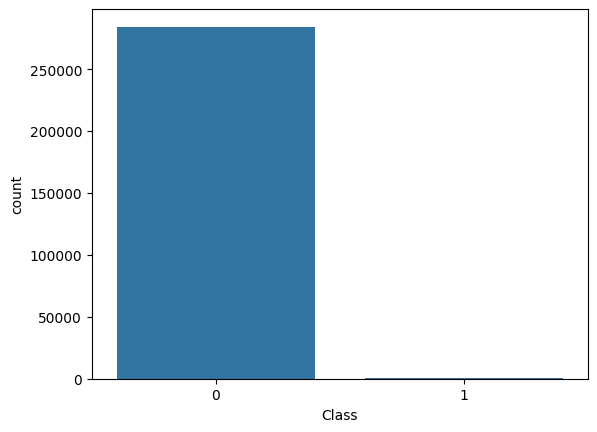

In [48]:
sns.barplot(Dataset['Class'].value_counts())

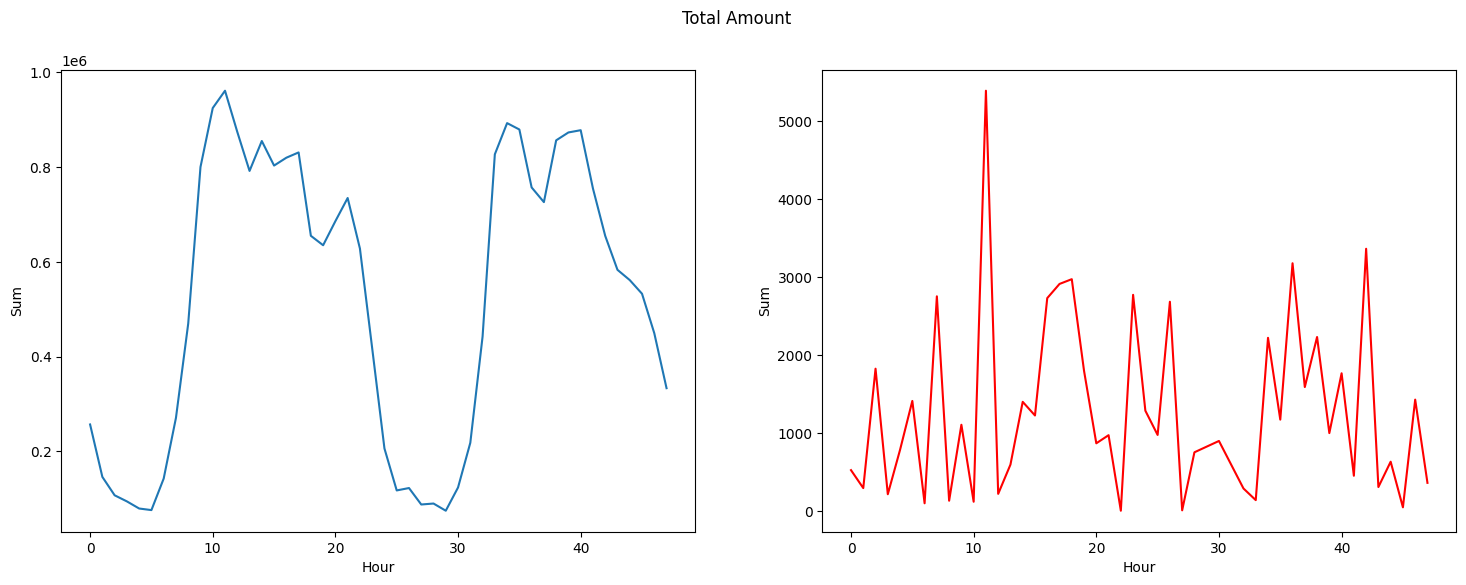

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

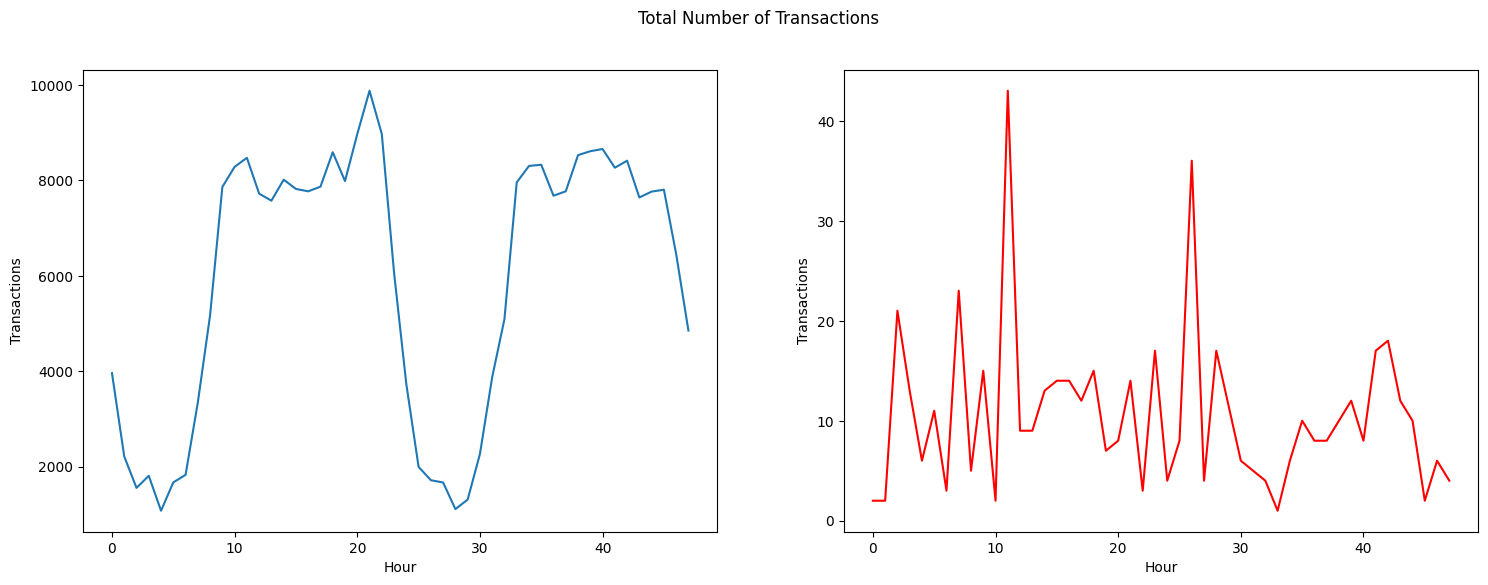

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

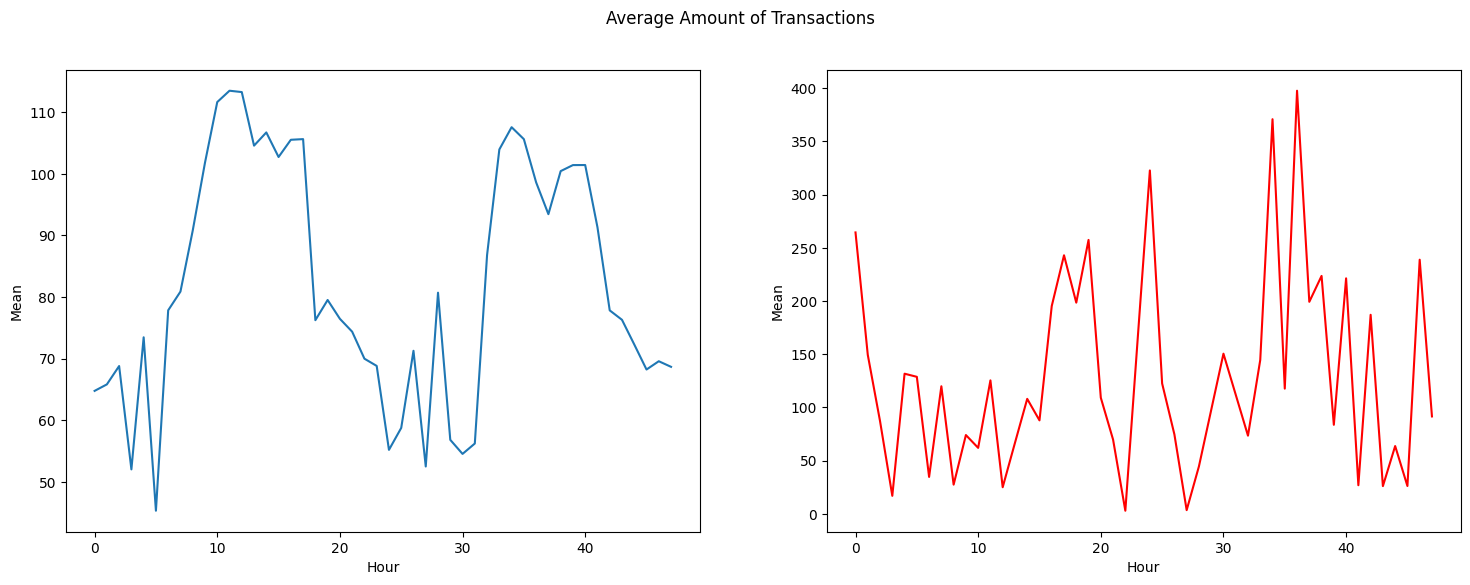

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

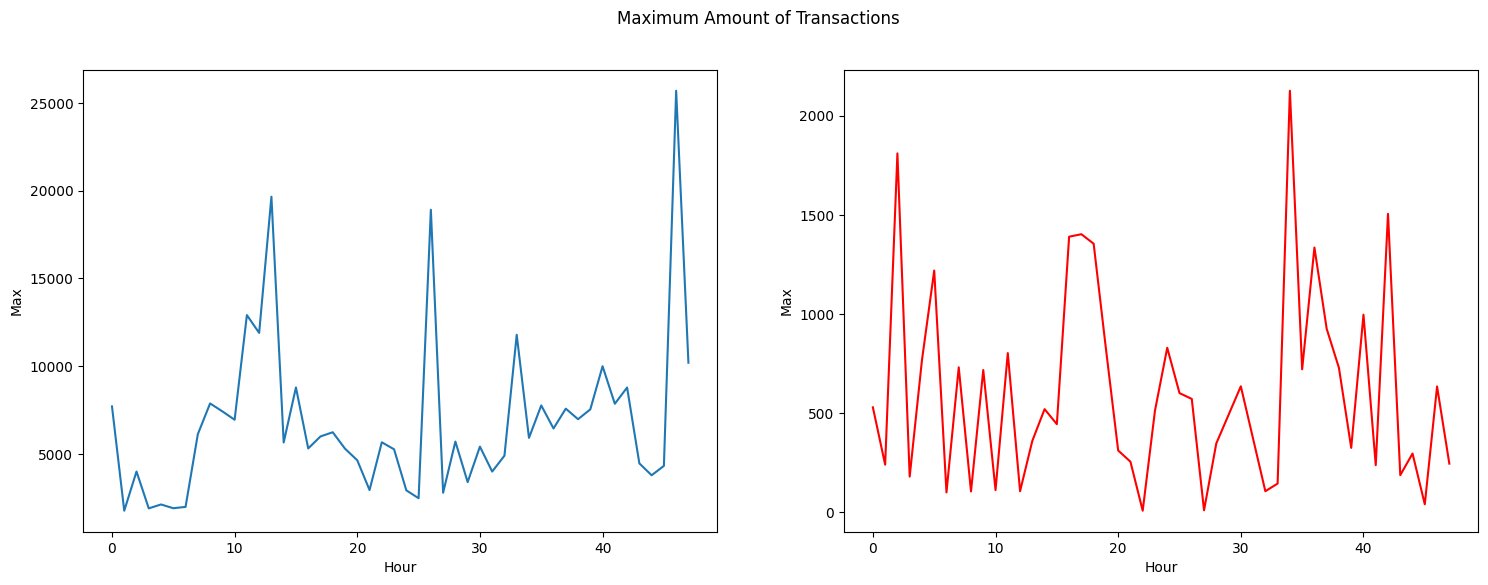

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

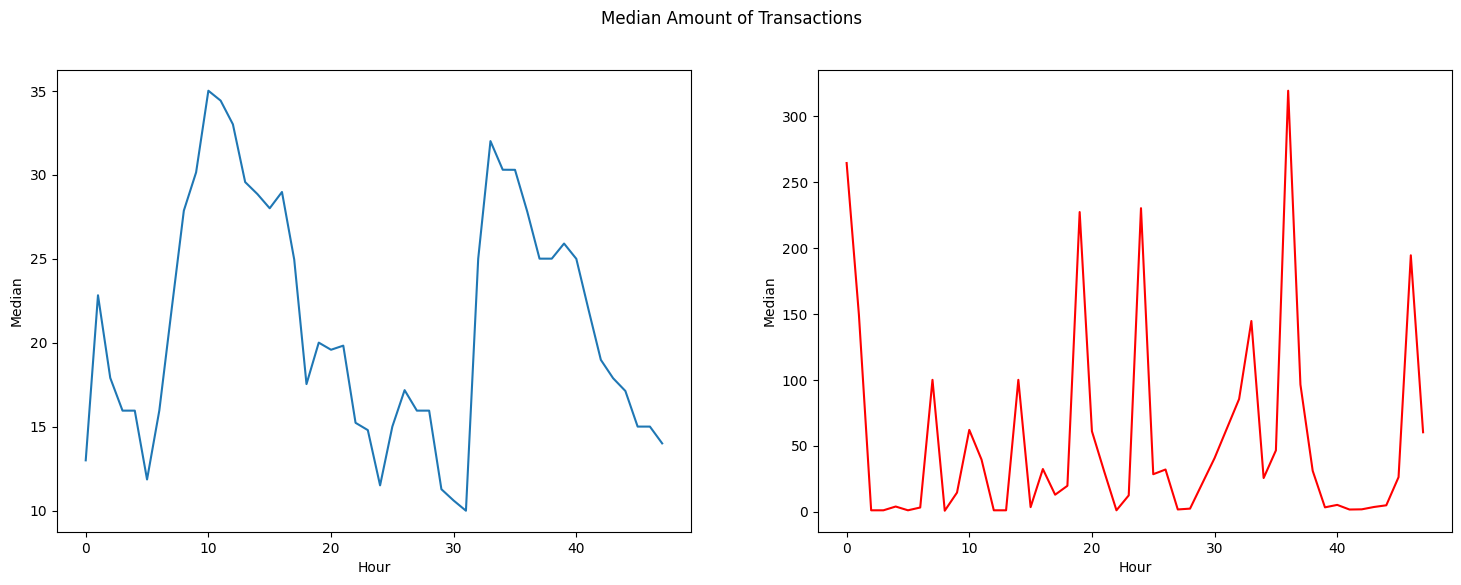

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

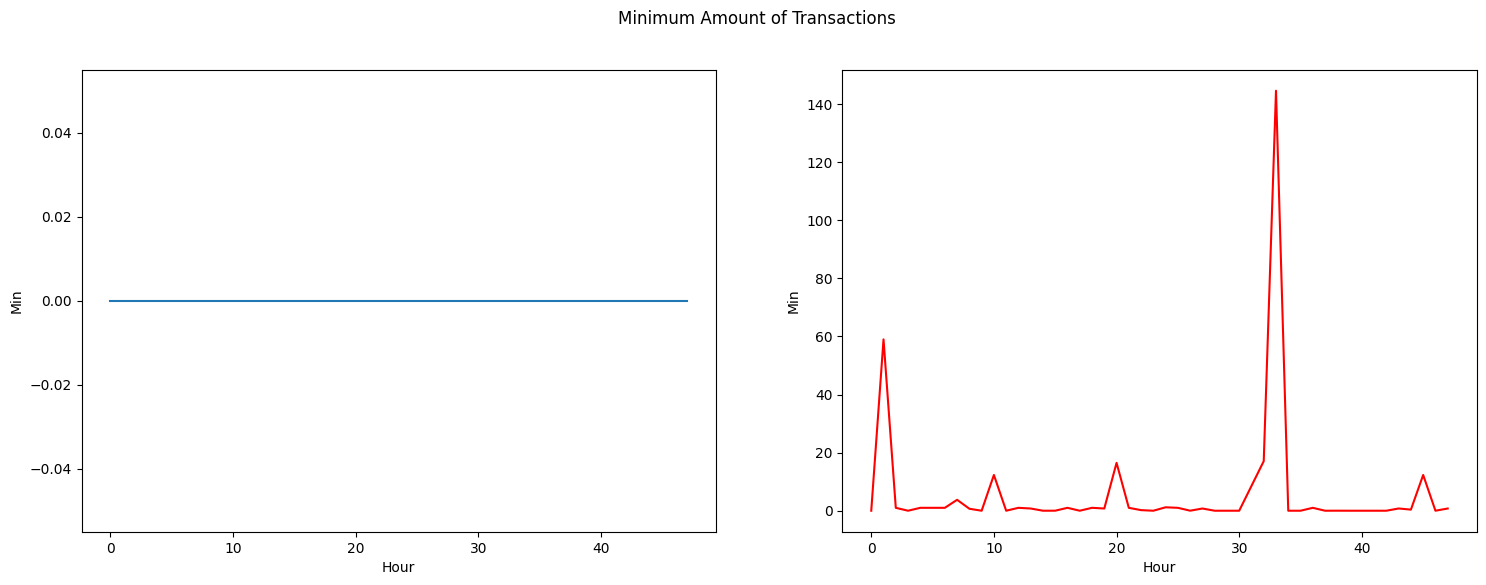

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

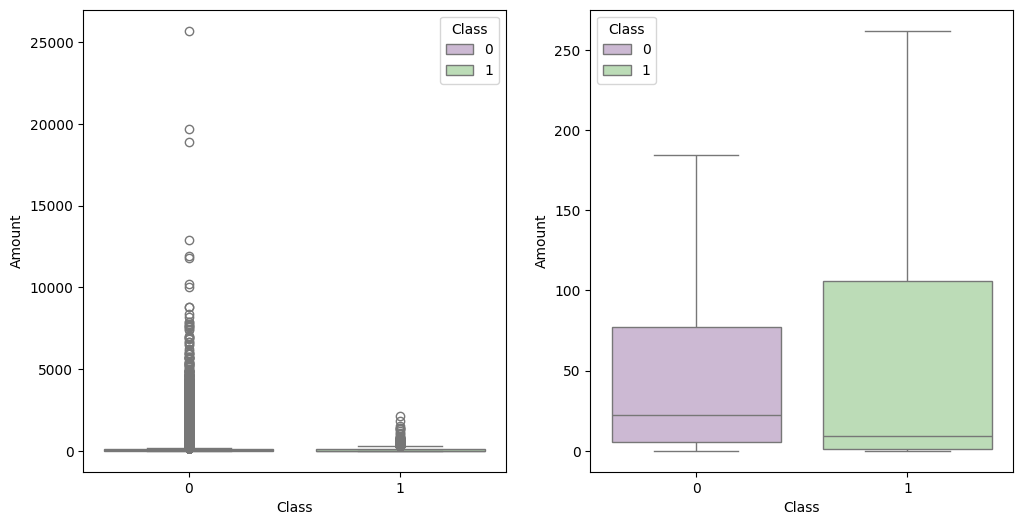

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=Dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=Dataset, palette="PRGn",showfliers=False)
plt.show();

In [56]:
tmp = Dataset[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [57]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

Non-fraud transactions: 51.06%
Fraud transactions: 48.94%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3977189262.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




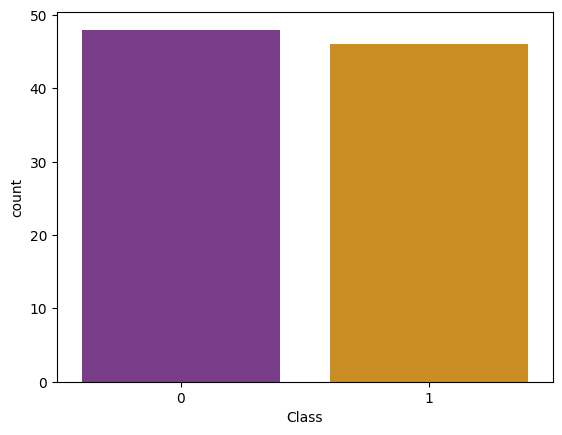

In [58]:
sns.countplot(x='Class', data=df, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))

This dataset is severely imbalanced (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class

In [59]:
Dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2550448492.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\L

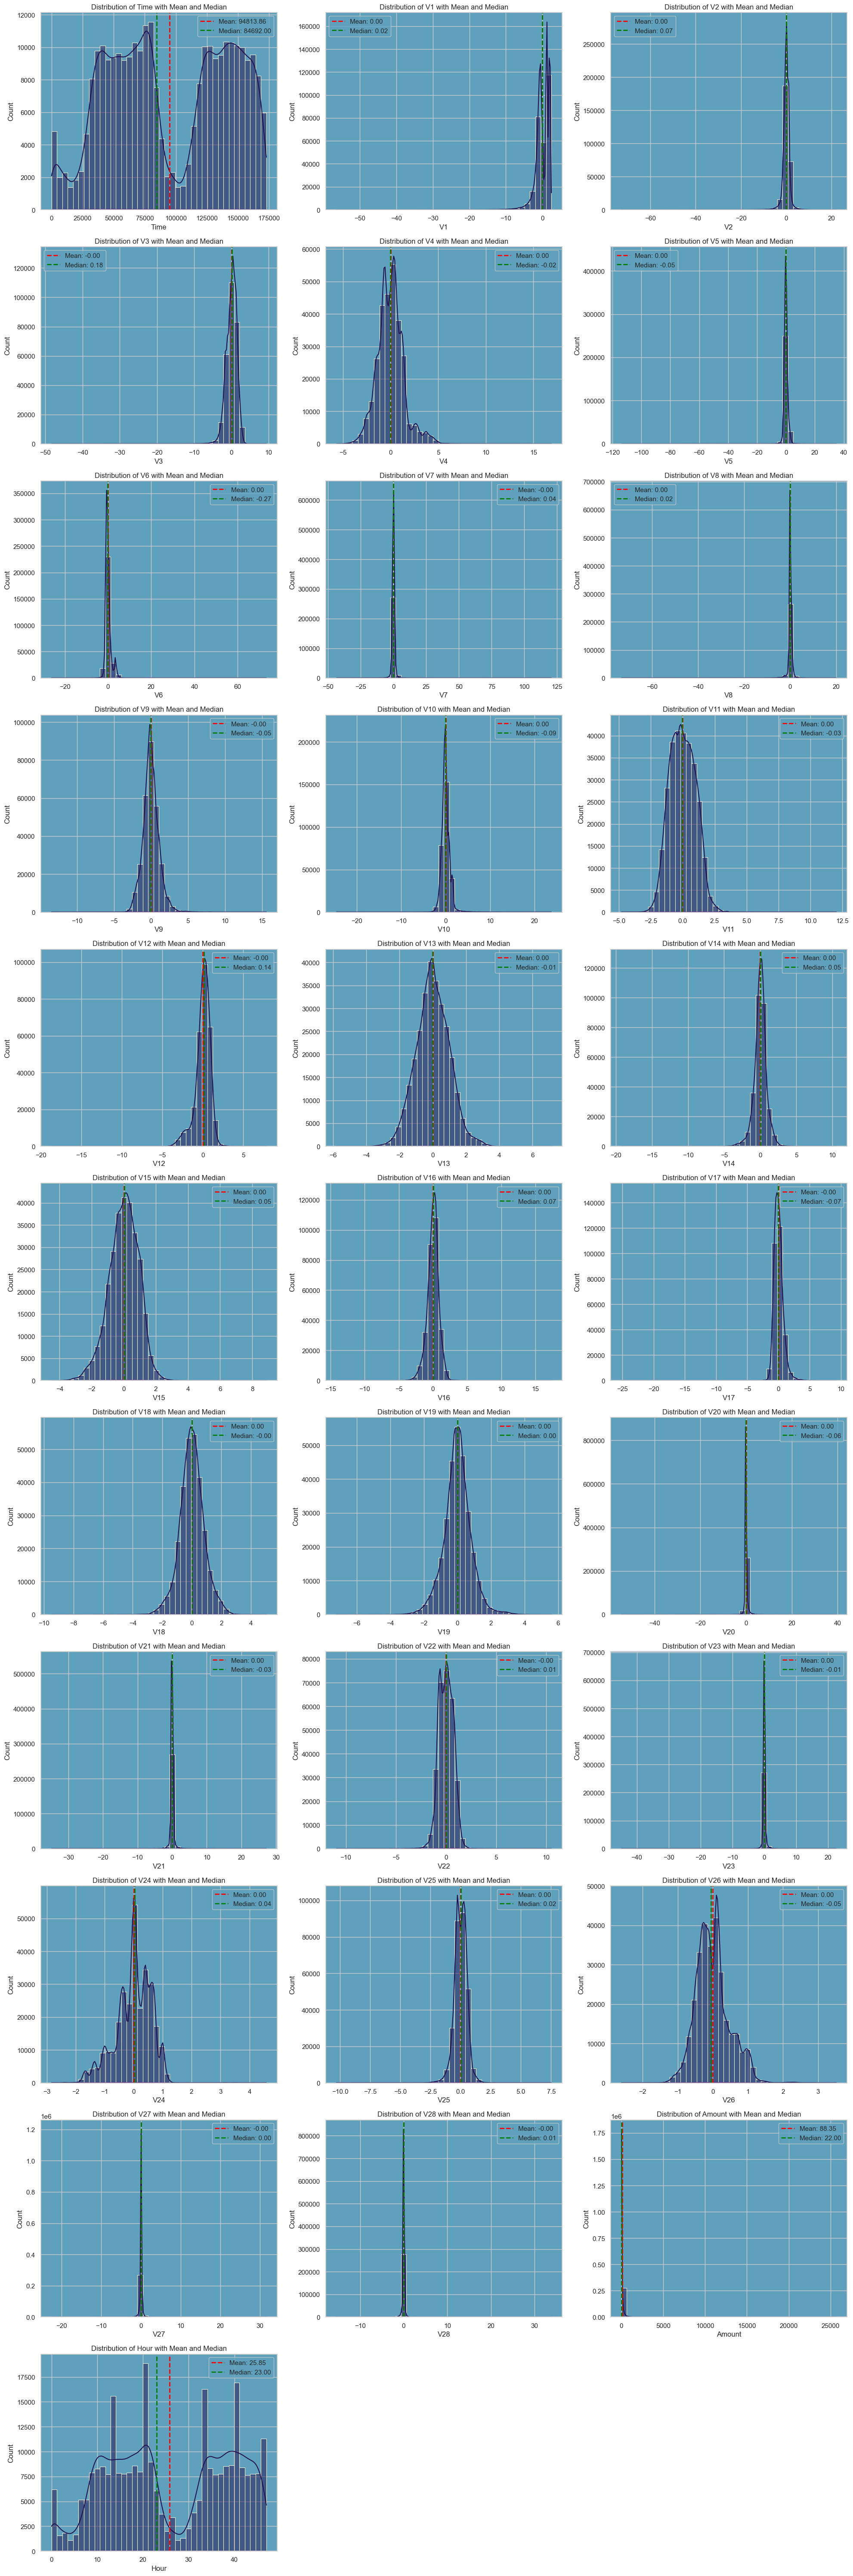

In [60]:
def create_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    num_columns = len(columns) - 1  # Exclude the hue column itself
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    plot_index = 0
    for col in columns:
        if col == hue:  # Skip the hue column itself
            continue

        sns.histplot(data=df, x=col, hue=hue, bins=40, palette=palette, edgecolor='white', kde=True, ax=axes[plot_index])
        
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        axes[plot_index].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[plot_index].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        
        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(col)
        axes[plot_index].set_ylabel('Count')
        axes[plot_index].legend()
        
        plot_index += 1
    
    # Remove extra axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
columns = Dataset.columns.to_list()  
palette = sns.color_palette("magma")  # Use the color palette list instead of cmap

create_subplots(df=Dataset, columns=columns, hue='Class', 
                theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                palette=palette, figsize=(20, 60))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3710480116.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3710480116.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3710480116.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3710480116.py:15: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3710480116.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed

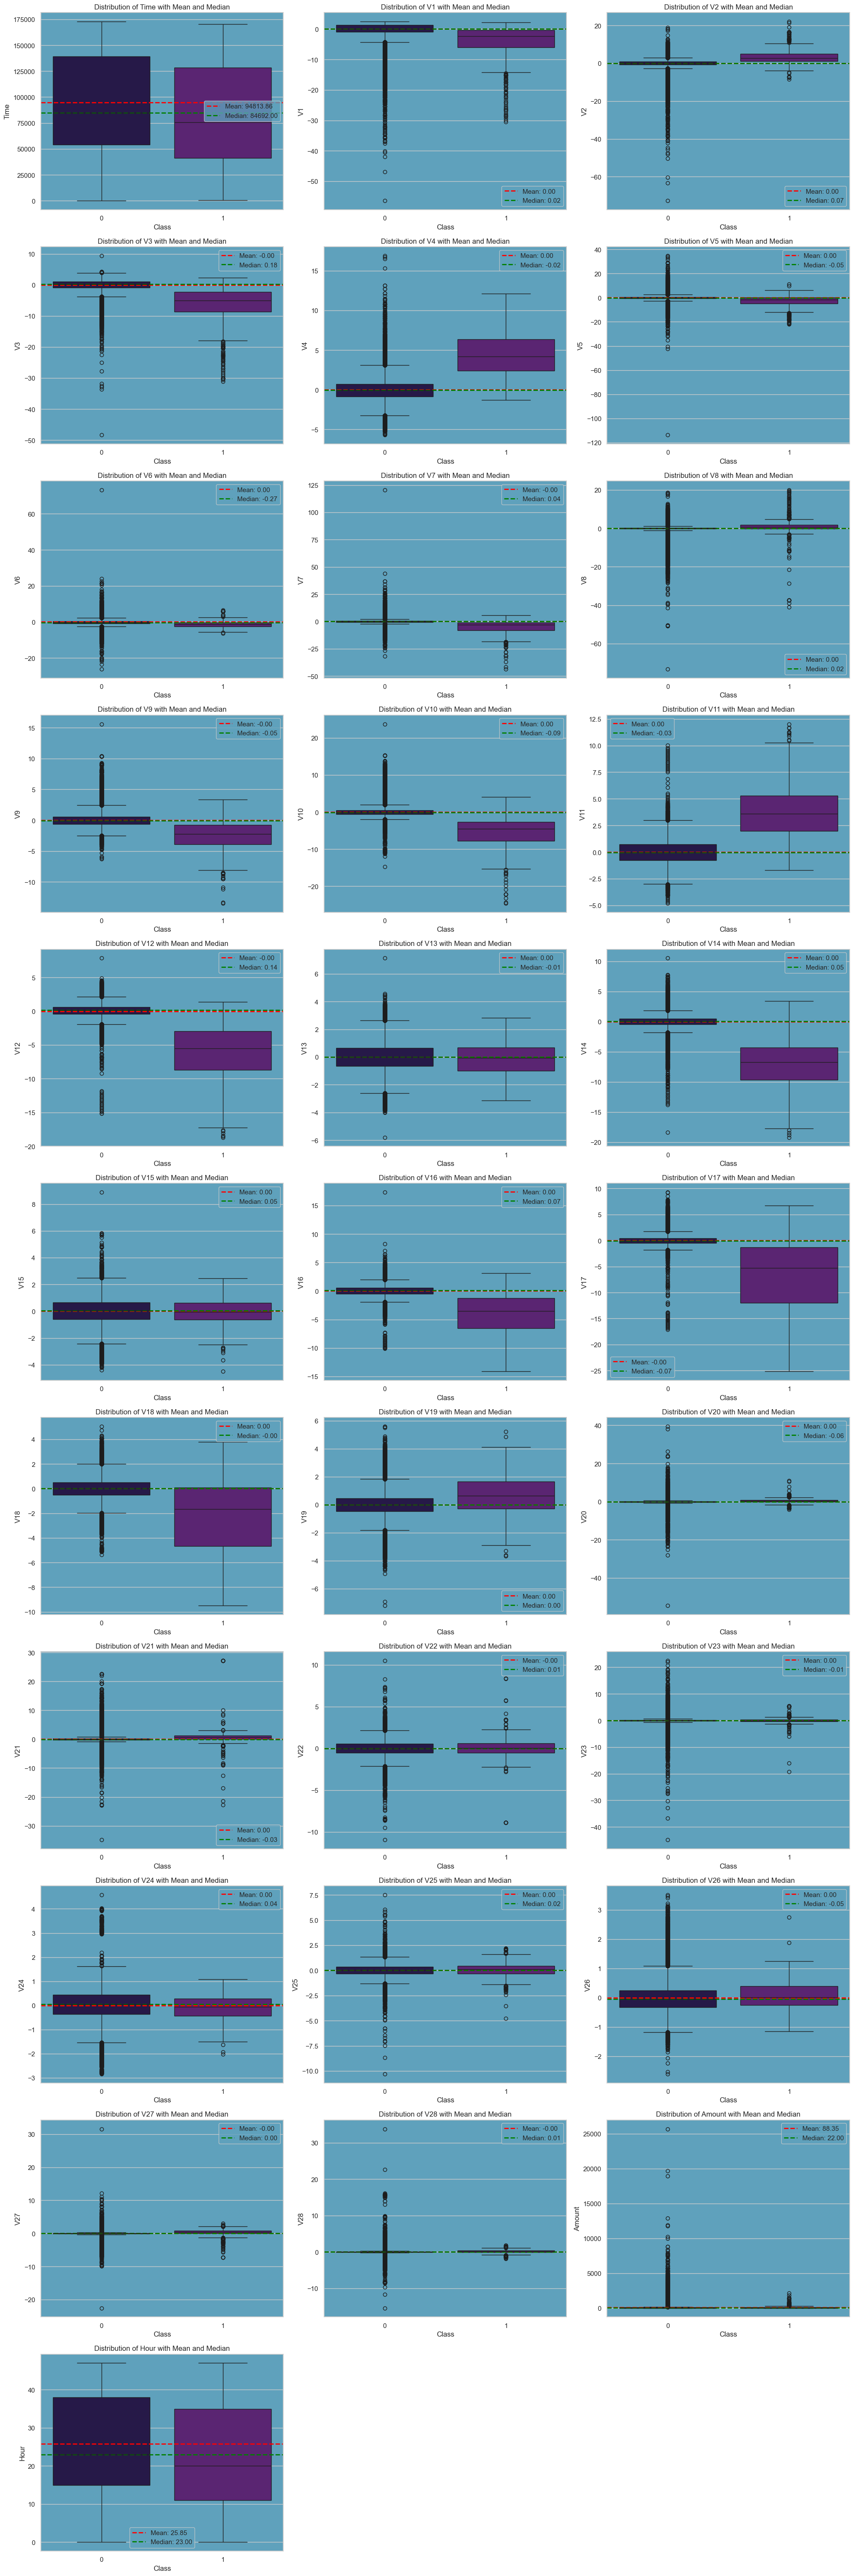

In [61]:
def create_boxplot_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    plot_index = 0
    for col in columns:
        if col == hue:  # Skip the hue column itself
            continue

        sns.boxplot(data=df, x=hue, y=col, palette=palette, ax=axes[plot_index])
        
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        axes[plot_index].axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[plot_index].axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')



        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(hue)
        axes[plot_index].set_ylabel(col)
        axes[plot_index].legend()
        
        plot_index += 1
    
    # Remove extra axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
columns = Dataset.columns.to_list() 
palette = sns.color_palette("magma")  # Use the color palette list instead of cmap

create_boxplot_subplots(df=Dataset, columns=columns, hue='Class', 
                        theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                        palette=palette, figsize=(20, 60))

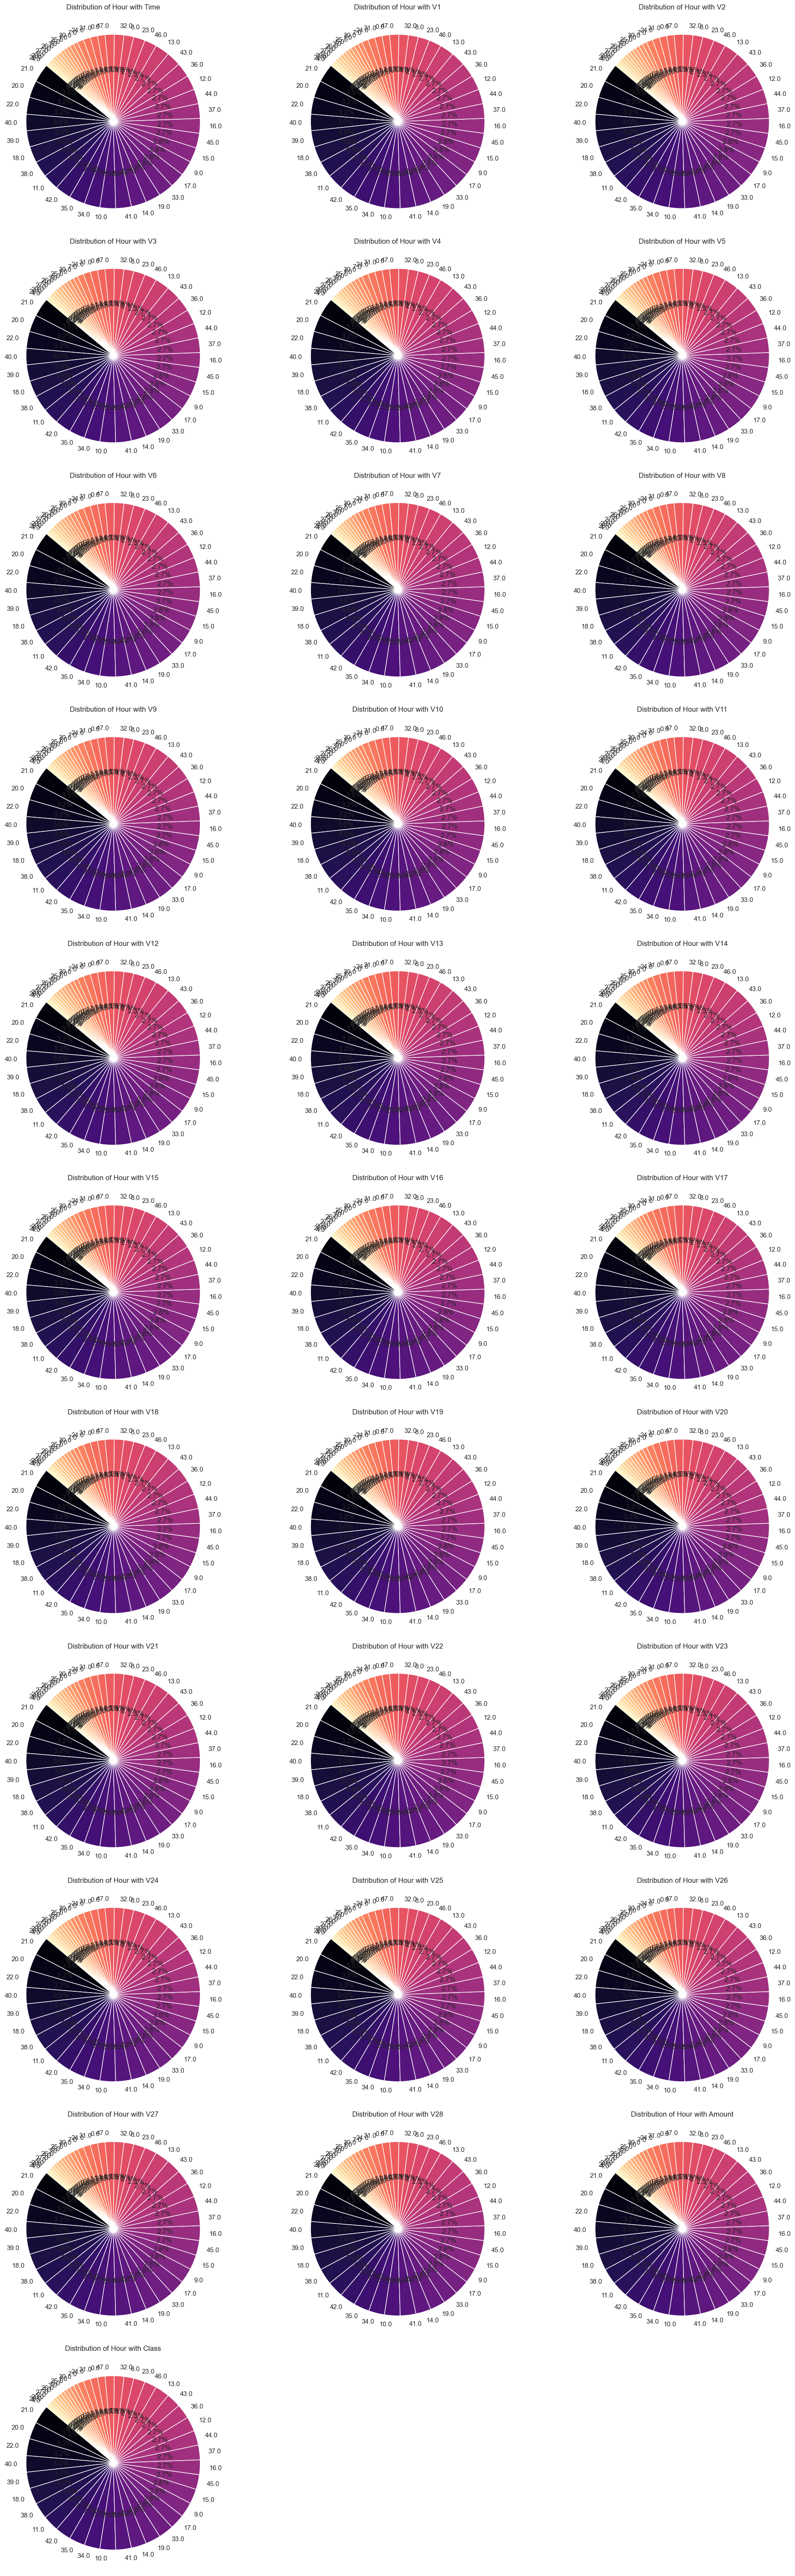

In [62]:
def create_piechart_subplots(df, columns, hue, theme_style, theme_rc, figsize=(15, 10)):
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    # Number of columns excluding the hue column
    num_columns = len(columns) - 1
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    plot_index = 0
    for col in columns:
        if col == hue:  # Skip the hue column itself
            continue

        # Count the occurrences of each class
        class_counts = df[hue].value_counts()

        # Create pie chart
        axes[plot_index].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("magma", len(class_counts)))
        axes[plot_index].set_title(f'Distribution of {hue} with {col}')
        plot_index += 1
    
    # Remove extra axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


columns = Dataset.columns.to_list() 
hue = columns[-1]  

create_piechart_subplots(df=Dataset, columns=columns, hue=hue, 
                         theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                         figsize=(20, 60))


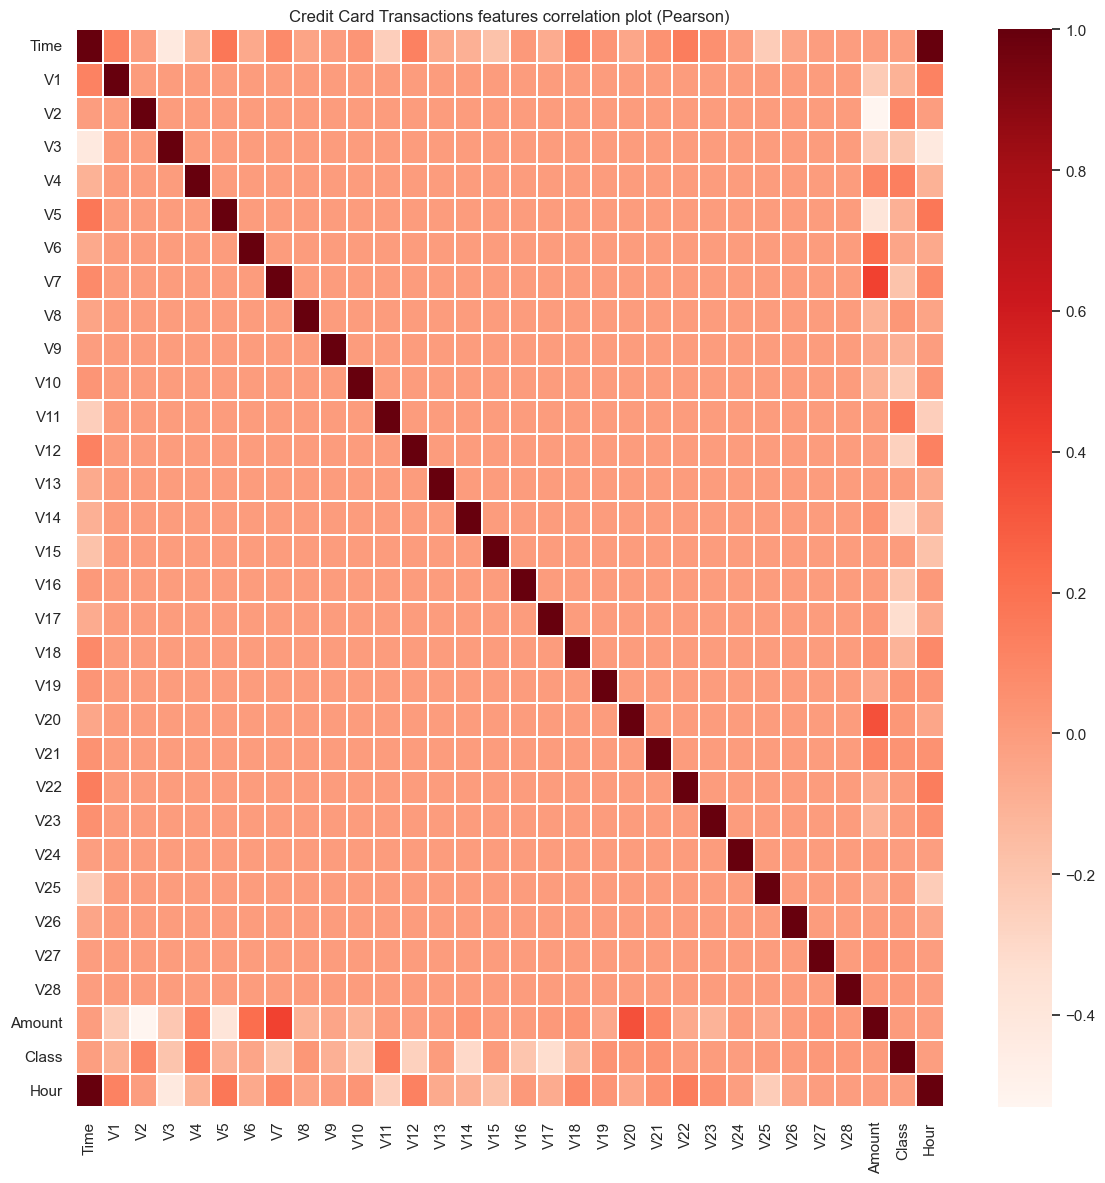

In [63]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = Dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

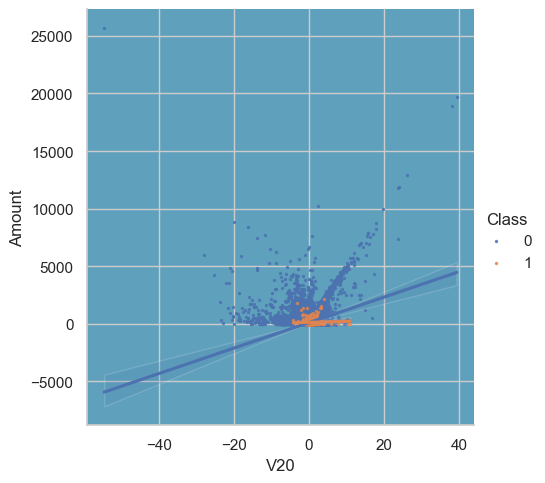

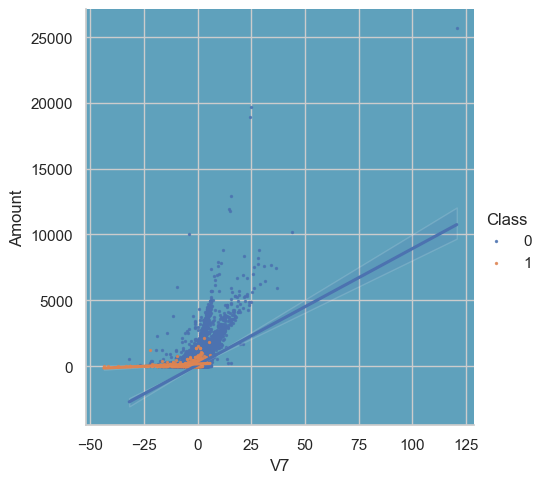

In [64]:
s = sns.lmplot(x='V20', y='Amount',data=Dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=Dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.

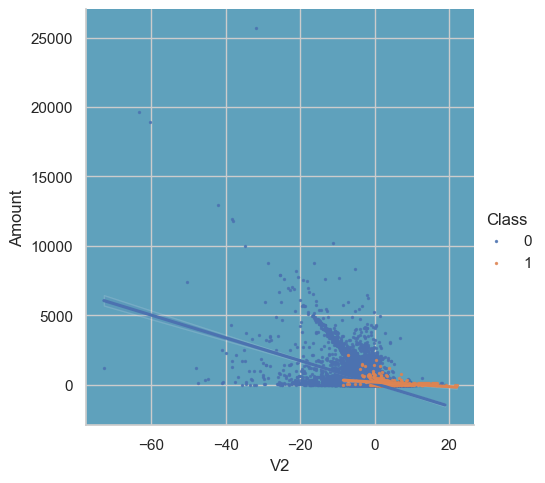

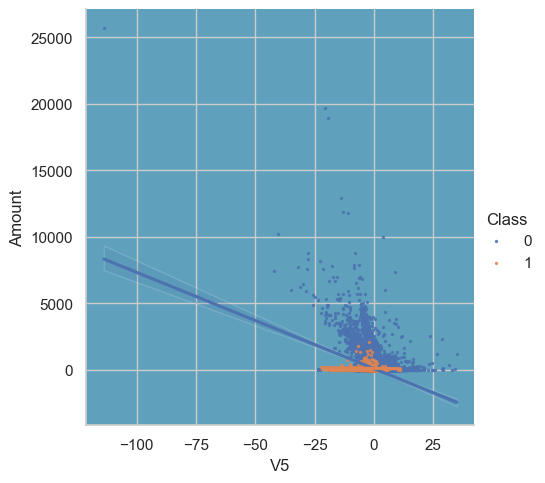

In [65]:
s = sns.lmplot(x='V2', y='Amount',data=Dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=Dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2048459342.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2048459342.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2048459342.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\2048459342.py:15: UserWarning:



The `bw` par

<Figure size 640x480 with 0 Axes>

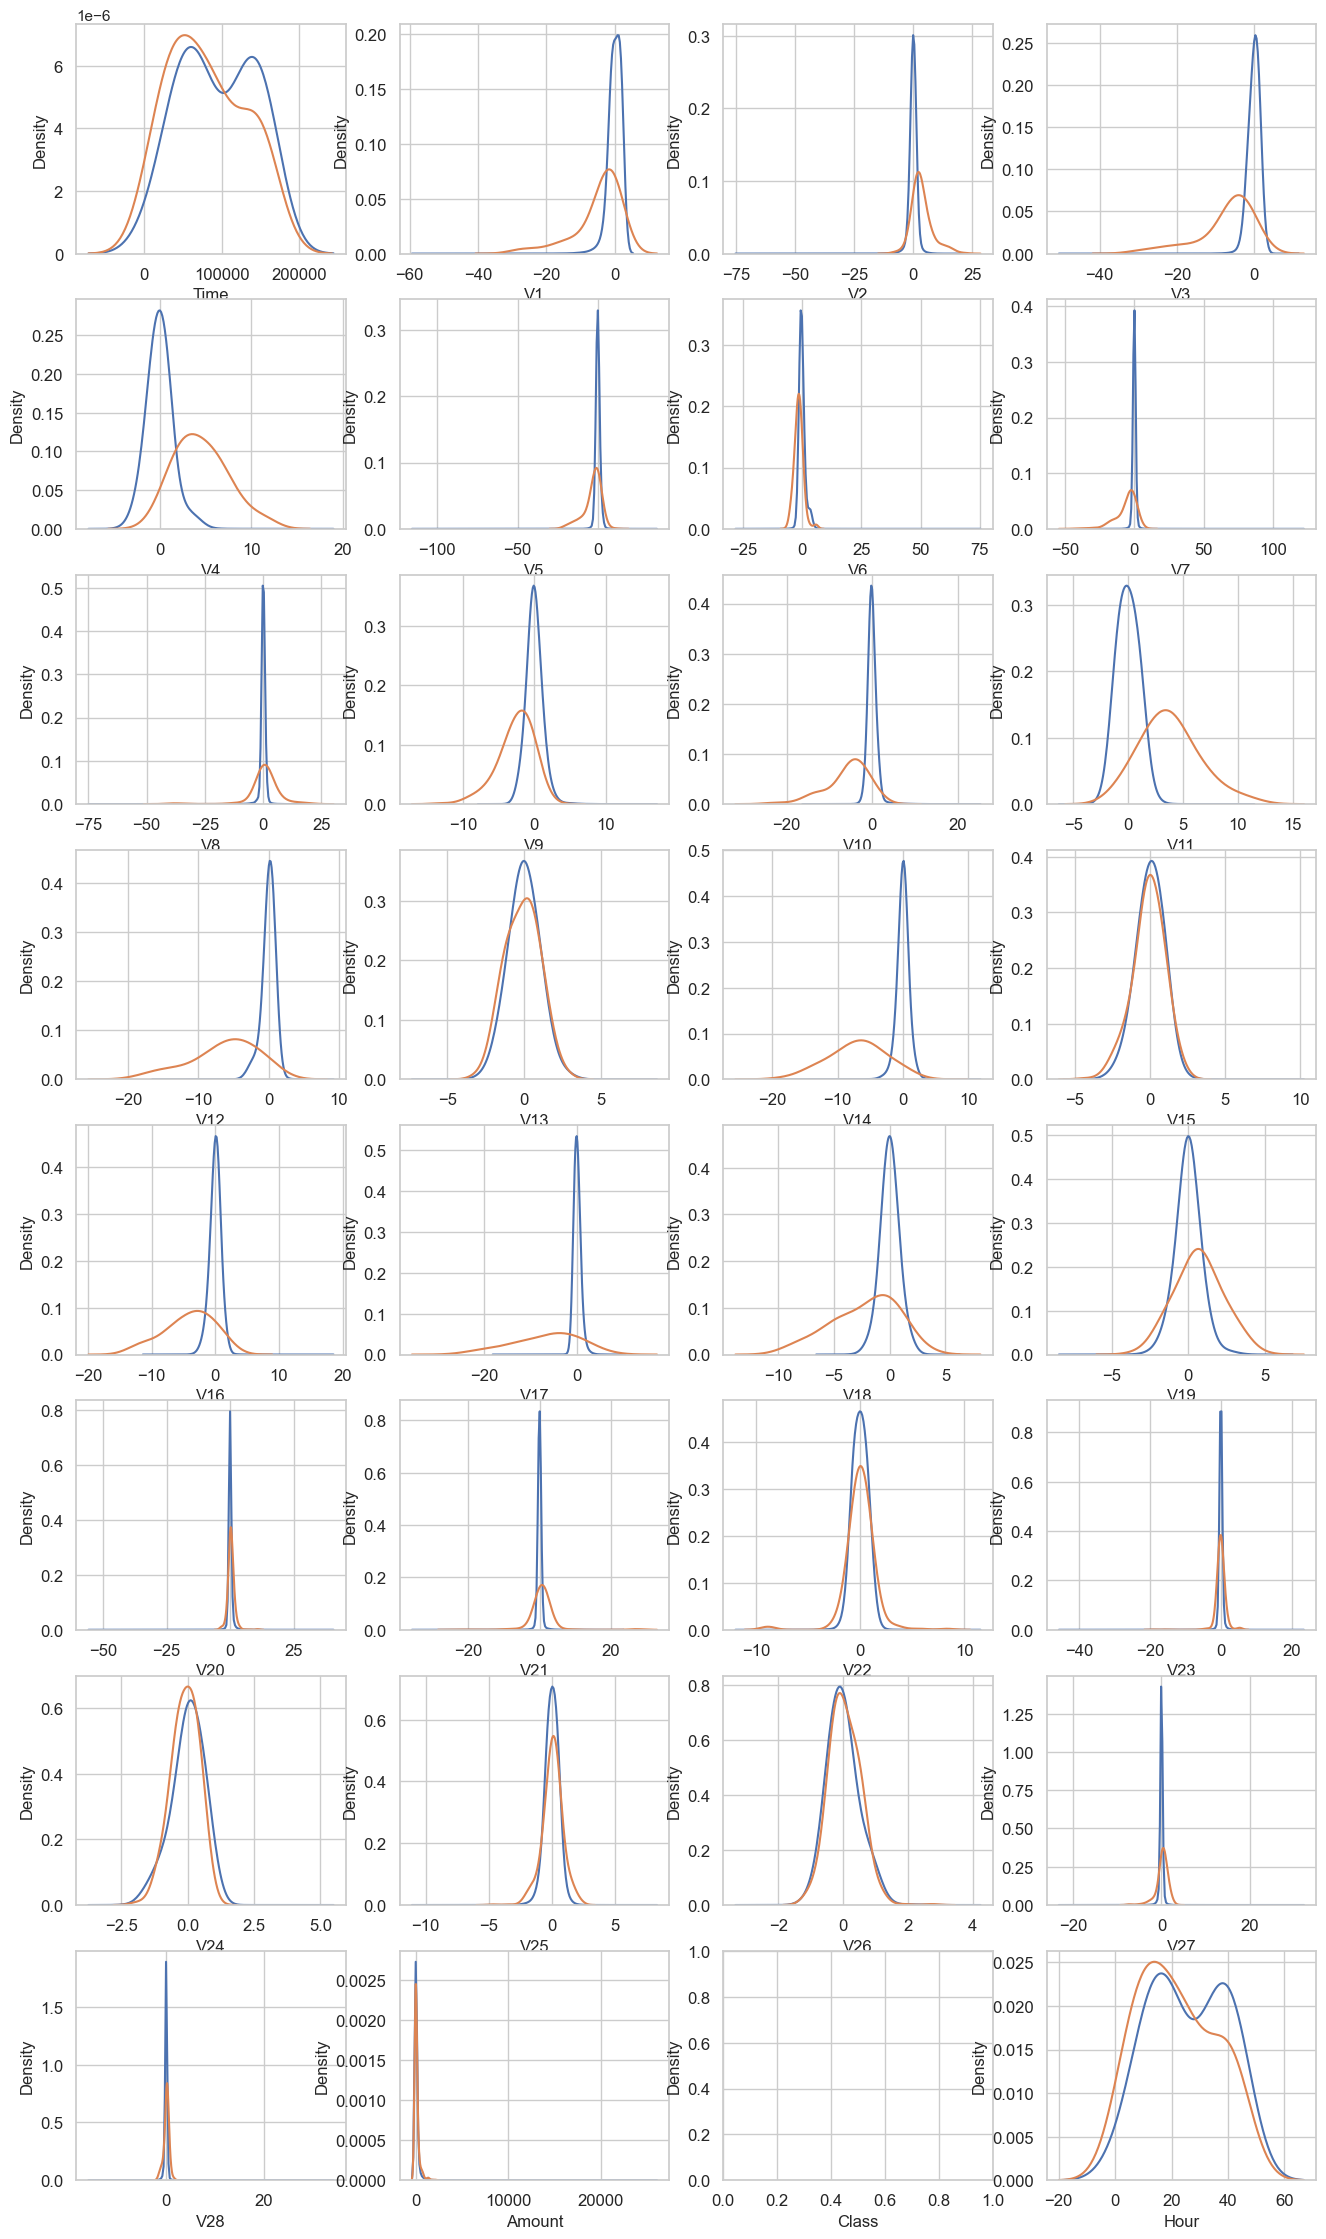

In [66]:
var = Dataset.columns.values

i = 0
t0 = Dataset.loc[Dataset['Class'] == 0]
t1 = Dataset.loc[Dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

# Predictive models

Define predictors and target values

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature

In [67]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [68]:
train_df, test_df = train_test_split(Dataset, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

RandomForestClassifier

Define model parameters

Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [77]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [78]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [79]:
preds = clf.predict(valid_df[predictors])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33772\3992975389.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



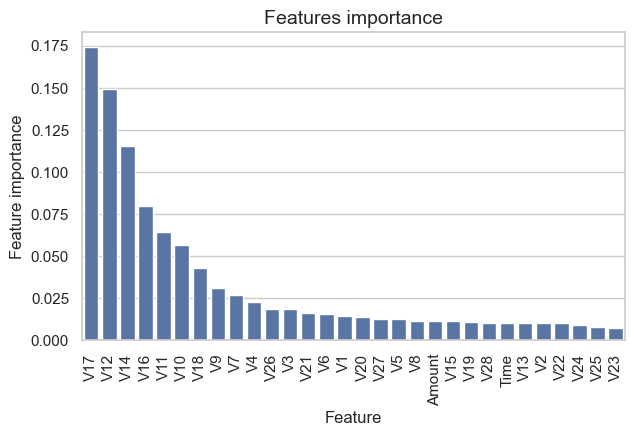

In [80]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are V17, V12, V14, V10, V11, V16.



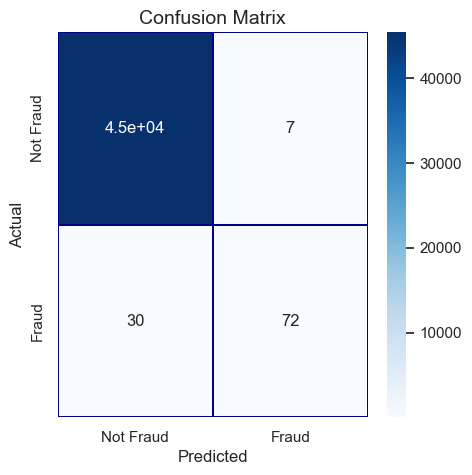

In [81]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Type I error and Type II error

We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

The following image explains what Type I error and Type II error are:

In [82]:
roc_auc_score(valid_df[target].values, preds)


0.8528641975628091

AdaBoostClassifier:

AdaBoostClassifier stands for Adaptive Boosting Classifier [5].

Prepare the model:

Let's set the parameters for the model and initialize the mod

In [83]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [84]:
clf.fit(train_df[predictors], train_df[target].values)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [86]:
preds = clf.predict(valid_df[predictors])
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
# Splitting the data into Features & Targets
X = Dataset.drop(columns='Class', axis=1)
y = Dataset['Class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 31) (227845, 31) (56962, 31)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [73]:
model.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [74]:
# accuracy on the training data

y_train_predicted = model.predict(X_train)
Training_data_accuracy = accuracy_score(y_train_predicted, y_train)
Training_data_accuracy

0.9990256534047269

In [87]:
# accuracy on the testing data

y_test_predicted = model.predict(X_test)
Testing_data_accuracy = accuracy_score(y_test_predicted, y_test)
Testing_data_accuracy

0.9990168884519505